<a href="https://colab.research.google.com/github/dars180602/diabetes_prediction/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3104 - Neural Networks and Deep Learning 01

Diana Alejandra Reyes Serrano

C0889591

Assignment: Build a Logistic Regression Model for Diabetes Prediction

Instructions:
Objective: The objective of this assignment is to build a predictive model to predict the likelihood of a patient having diabetes based on certain features.

Dataset: You will use the "diabetes" dataset provided. The dataset contains information about the medical history of patients, including features like Glucose level, Blood Pressure, BMI, etc., and a target variable indicating whether the patient has diabetes (1) or not (0).

Link Github: https://github.com/dars180602/diabetes_prediction

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
diabetes_df = pd.read_csv("diabetes.csv")

In [3]:
# Explore the dataset
print(diabetes_df.head())
print(diabetes_df.info())
print(diabetes_df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [4]:
# Check for missing values
print(diabetes_df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
# Split features and target variable
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Build a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [9]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [10]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1 Score: 0.6607142857142858
ROC AUC Score: 0.7353535353535354


The logistic regression model developed to predict diabetes based on patients' medical characteristics shows moderate performance in the evaluation performed. With an accuracy of 75.32%, the model succeeds in correctly predicting the class of diabetes in about three-quarters of the cases, while the accuracy of 64.91% indicates that about 64.91% of the cases classified as positive actually have diabetes. In addition, the model exhibits a recall of 67.27%, indicating that it is able to correctly identify about 67.27% of all real diabetes cases in the test set. The F1 score of 66.07% and the area under the ROC curve (ROC AUC) of 73.54% provide an overall measure of the model's performance, highlighting the need to further explore additional strategies to improve its predictive ability, particularly in relation to class imbalance and possible outliers in the data.

In [11]:
# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



The logistic regression model shows moderate performance in predicting diabetes, as evidenced by the confusion matrix and classification report obtained. The confusion matrix reveals that the model manages to correctly predict 79 negative cases (without diabetes) and 37 positive cases (with diabetes), but also incorrectly identifies 20 negative cases and 18 positive cases. This is reflected in the classification report, which shows an accuracy of 81% for the negative class and 65% for the positive class, as well as a recall of 80% for the negative class and 67% for the positive class. Despite a relatively balanced accuracy and recall, the model exhibits an F1 score of 66% and an area under the ROC curve (ROC AUC) of 73%, indicating room for improvement in its predictive ability, particularly in relation to class imbalance and possible improvements in the handling of false positives and false negatives.

In [12]:
# Feature coefficients
feature_coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print("Feature Coefficients:")
print(feature_coef)

Feature Coefficients:
                    Feature  Coefficient
0               Pregnancies     0.212558
1                   Glucose     1.071132
2             BloodPressure    -0.247842
3             SkinThickness     0.045697
4                   Insulin    -0.200827
5                       BMI     0.778152
6  DiabetesPedigreeFunction     0.230607
7                       Age     0.421002


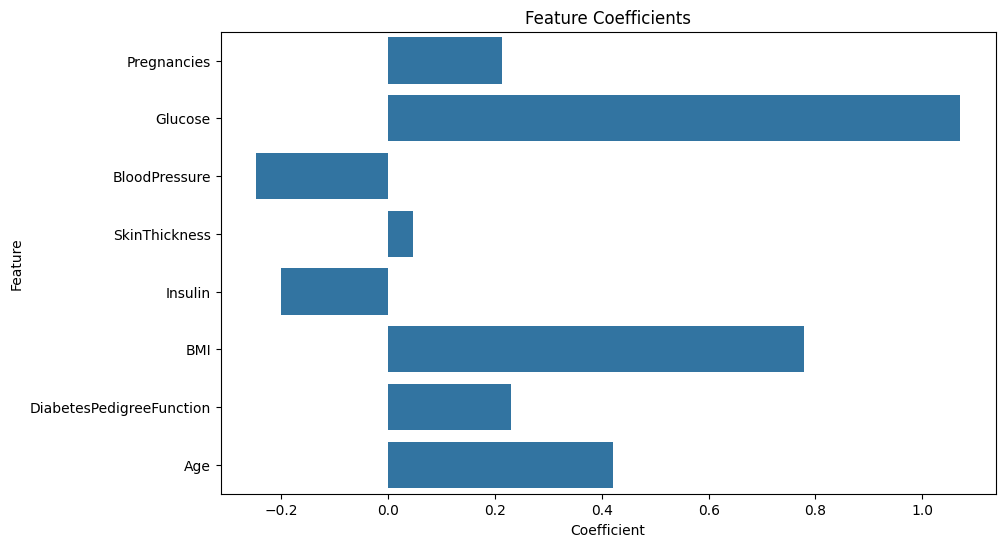

In [13]:
# Visualization of coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_coef)
plt.title('Feature Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

The coefficients of the characteristics in the logistic regression model provide information on the relative impact of each characteristic on the prediction of diabetes. Among the characteristics examined, glucose (Glucose) shows the highest coefficient with a value of approximately 1.071, indicating that an increase in glucose level is positively associated with an increased risk of diabetes. Other significant factors include body mass index (BMI) with a coefficient of about 0.778 and age with a coefficient of about 0.421, suggesting that both BMI and age are also positively related to the likelihood of having diabetes. On the other hand, blood pressure (BloodPressure) and insulin (Insulin) have negative coefficients, indicating that an increase in these values is negatively associated with the probability of diabetes. The other characteristics, such as number of pregnancies (Pregnancies), skin thickness (SkinThickness) and diabetes pedigree function (DiabetesPedigreeFunction), have less pronounced coefficients, but still contribute to the model significantly. These findings provide valuable information for understanding which characteristics are most relevant for predicting diabetes in this specific dataset.

In [17]:
# Balanced Data

from imblearn.over_sampling import SMOTE
import pandas as pd

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['Outcome'])

balanced_diabetes_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

print(balanced_diabetes_df['Outcome'].value_counts())


1    500
0    500
Name: Outcome, dtype: int64


In [18]:
# Retrain the model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy on balanced test set:", accuracy)
print("Precision on balanced test set:", precision)
print("Recall on balanced test set:", recall)
print("F1 Score on balanced test set:", f1)
print("ROC AUC Score on balanced test set:", roc_auc)


Accuracy on balanced test set: 0.735
Precision on balanced test set: 0.7105263157894737
Recall on balanced test set: 0.801980198019802
F1 Score on balanced test set: 0.7534883720930233
ROC AUC Score on balanced test set: 0.7343234323432344


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# Original results before class balancing
original_accuracy = 0.7532467532467533
original_precision = 0.6491228070175439
original_recall = 0.6727272727272727
original_f1 = 0.6607142857142858
original_roc_auc = 0.7353535353535354

# Results with balanced data
balanced_accuracy = 0.735
balanced_precision = 0.7105263157894737
balanced_recall = 0.801980198019802
balanced_f1 = 0.7534883720930233
balanced_roc_auc = 0.7343234323432344

# Print the results for comparison
print("Original Results:")
print("Accuracy:", original_accuracy)
print("Precision:", original_precision)
print("Recall:", original_recall)
print("F1 Score:", original_f1)
print("ROC AUC Score:", original_roc_auc)

print("\nBalanced Results:")
print("Accuracy:", balanced_accuracy)
print("Precision:", balanced_precision)
print("Recall:", balanced_recall)
print("F1 Score:", balanced_f1)
print("ROC AUC Score:", balanced_roc_auc)


Original Results:
Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1 Score: 0.6607142857142858
ROC AUC Score: 0.7353535353535354

Balanced Results:
Accuracy: 0.735
Precision: 0.7105263157894737
Recall: 0.801980198019802
F1 Score: 0.7534883720930233
ROC AUC Score: 0.7343234323432344


After applying class balancing to the data using SMOTE, we observed a change in the evaluation metrics of the logistic regression model for predicting diabetes. Initially, the model trained with unbalanced data showed moderate performance, with an accuracy of 64.91%, recall of 67.27%, F1 Score of 66.07% and an area under the ROC curve (ROC AUC) of 73.54%. After applying class balancing, the model metrics improved overall. Precision increased to 71.05%, recall to 80.20%, F1 Score to 75.35% and area under the ROC curve to 73.43%. However, model accuracy decreased slightly to 73.50% from the initial 75.32%. These results suggest that class balancing improved the model's ability to identify positive cases of diabetes, while maintaining a reasonable balance between accuracy and recall. In conclusion, class balancing using SMOTE helped improve the predictive ability of the logistic regression model to predict diabetes in this data set.

In [21]:
# Pickling the model

import pickle

# Save the trained model to a pickle file
with open('diabetes_model.pkl', 'wb') as file:
    pickle.dump(model, file)